# Primer punto 

## 3.1 Ejemplo: red binaria no dirigida

In [1]:
# llamamos las librerias 
import networkx as nx
# definimos el grafo a trabajar 
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,5), (4,5), (4,6), (4,7), (5,6), (6,7)])

In [2]:
# imprimimos el tipo de dato y la direccion de memoria
print(type(G),'\n',id(G))

<class 'networkx.classes.graph.Graph'> 
 1618267759184


In [3]:
# mostrar nodos y la cantidad
print(G.nodes(),'\n',G.number_of_nodes())

[1, 2, 3, 4, 5, 6, 7] 
 7


In [4]:
# aristas y la cantidad
print(G.edges(),'\n',G.number_of_edges())

[(1, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5), (4, 6), (4, 7), (5, 6), (6, 7)] 
 10


In [5]:
import sys
sys.path.append('../src')
from utilidades import tallo_y_hoja
tallo_y_hoja(G)

1 -- [2, 3]
2 -- [1, 3, 4]
3 -- [1, 2, 5]
4 -- [2, 5, 6, 7]
5 -- [3, 4, 6]
6 -- [4, 5, 7]
7 -- [4, 6]


In [6]:
# es ponderada? 
print(nx.is_weighted(G))

False


In [7]:
# es simple?
print(G.is_multigraph()==False)

True


Text(0.5, 1.0, 'Red binaria no dirigida')

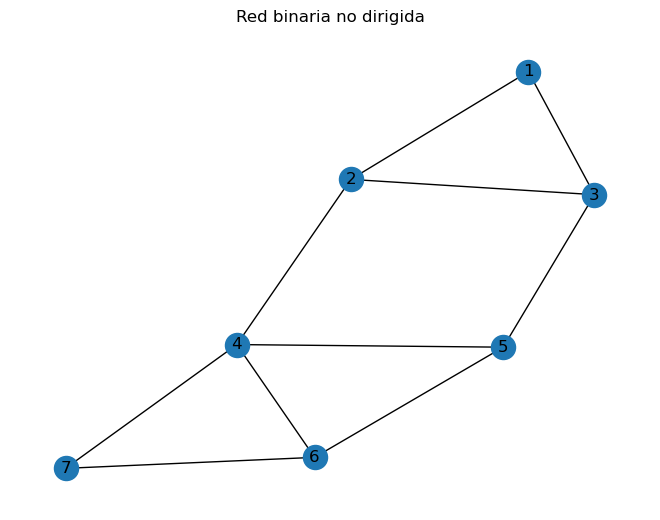

In [9]:
#visualizar el grafo con titulo
import random 
random.seed(0)
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)
plt.title("Red binaria no dirigida")

## 3.2 Ejmplo: red ponderada no dirigida

In [ ]:
# red ponderada no dirigida